# External validation of the XGBoost model

Trained on EPIC and 450k data.

Validating on Chopra testing data, so 272 ex vivo needle 
biopsy samples (see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5354921/)

Also validating on Brennan, Wei and Eveloenn data.

We have pre-processed these datasets in data/preprocess_validation_data.Rmd

In [195]:
import pandas as pd

pathology
0    174
1    278
2     14
3     38
4     14
Name: count, dtype: int64

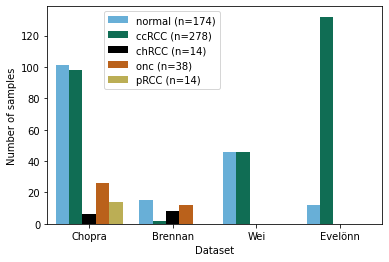

In [203]:
# getting barplots for sample numbers in external datasets

mapping = {'Normal': 0, 'KIRC': 1, 'KICH': 2, 'oncocytoma': 3, 'KIRP': 4, 'normal': 0, 'Other': 5}

diagnoses_chopra = pd.read_csv('data/Chopra_external/preprocessed_validation_pdata.testing_diagnoses.csv')
diagnoses_chopra['overallpath'] = [mapping[l] for l in diagnoses_chopra['label']]

stanford_diagnoses = pd.read_csv('data/Brennandata/preprocessed_validation_diagnoses.csv')
mapping = {'Normal kidney parenchyma': 0, 'Clear cell RCC': 1, 'RCC-Chromophobe': 2, 'Oncocytoma': 3}
stanford_diagnoses['overallpath'] = [mapping[l] for l in stanford_diagnoses['Sample_Type']]

GSE_diagnoses = pd.read_csv('data/Wei_external/preprocessed_validation_diagnoses.csv')
mapping = {'Normal': 0, 'KIRC': 1}
GSE_diagnoses['overallpath'] = [mapping[l] for l in GSE_diagnoses['label']]

diagnoses_evelonn = pd.read_csv('data/Evelonn_external/preprocessed_validation_beta_diagnoses_from_normalised_data.csv')
mapping = {'Normal': 0, 'ccRCC': 1}
diagnoses_evelonn['overallpath'] = [mapping[l] for l in diagnoses_evelonn['diagnosis']]


diagnoses_chopra = pd.DataFrame(diagnoses_chopra['overallpath'].value_counts())
diagnoses_chopra['Source'] = 'Chopra'

stanford_diagnoses = pd.DataFrame(stanford_diagnoses['overallpath'].value_counts())
stanford_diagnoses['Source'] = 'Brennan'

GSE_diagnoses = pd.DataFrame(GSE_diagnoses['overallpath'].value_counts())
GSE_diagnoses['Source'] = 'Wei'

diagnoses_evelonn = pd.DataFrame(diagnoses_evelonn['overallpath'].value_counts())
diagnoses_evelonn['Source'] = 'Evelönn'


to_plot = diagnoses_chopra.append(stanford_diagnoses).append(GSE_diagnoses).append(diagnoses_evelonn)
to_plot['pathology'] = to_plot.index
to_plot.columns = ['count', 'Source', 'pathology']

# get labels for legend that give number of samples in each class
ns = to_plot.groupby('pathology').sum()['count']
ns
labels_with_ns = ['normal (n=' + str(ns.loc[0]) + ')',
                  'ccRCC (n=' + str(ns.loc[1]) + ')',
                  'chRCC (n=' + str(ns.loc[2]) + ')',
                  'onc (n=' + str(ns.loc[3]) + ')',
                  'pRCC (n=' + str(ns.loc[4]) + ')',
                 ]

import matplotlib.pyplot as plt
import seaborn as sb
bp = sb.barplot(data = to_plot, x = 'Source', y= 'count', hue = 'pathology', palette = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"])
           
yl = plt.ylabel('Number of samples')
xl = plt.xlabel('Dataset')
handles = bp.get_legend_handles_labels()[0]
bp.legend(handles = handles, labels=labels_with_ns, loc='best', bbox_to_anchor=(0.28, 0., 0.25, 1))

plt.savefig('figs_xgboost_validation/number_of_samples_barplot.svg', bbox_inches='tight')


In [8]:
# number of samples total in each source
to_plot.groupby(['Source', 'pathology']).sum()
to_plot.groupby('Source').sum()

count
Source  pathology       
Brennan 0             15
        1              2
        2              8
        3             12
Chopra  0            101
        1             98
        2              6
        3             26
        4             14
Evelönn 0             12
        1            132
Wei     0             46
        1             46

,count,pathology
Source,,
Brennan,37,6
Chopra,245,10
Evelönn,144,1
Wei,92,1


### Validation using external Chopra data

In [10]:
import pandas as pd
data = pd.read_csv('data/Chopra_external/preprocessed_validation_beta.testing.csv', sep = ',')
diagnoses = pd.read_csv('data/Chopra_external/preprocessed_validation_pdata.testing_diagnoses.csv')

In [11]:
data
seqnames = data['seqnames']
start = data['start']
colnames = data.columns[6:]

,Unnamed: 0,seqnames,start,end,width,strand,X8784241029_R01C01,X8784241029_R02C01,X8784241029_R03C01,X8784241029_R04C01,...,X9682764089_R04C01,X9682764089_R05C01,X9682764089_R06C01,X8784241087_R02C01,X8795194001_R05C02,X8795194001_R06C02,X8795194002_R01C01,X8795194089_R05C01,X8795194089_R06C01,X8795194089_R01C02
0,1,chr16,53434200,53434201,2,*,0.491547,0.756015,0.836500,0.459391,...,0.416584,0.264058,0.410793,0.445198,0.387918,0.239592,0.318850,0.365095,0.538317,0.598139
1,2,chr6,25282551,25282552,2,*,0.941658,0.938842,0.952120,0.947600,...,0.940995,0.948560,0.910616,0.936338,0.951142,0.920291,0.933399,0.948472,0.919370,0.953285
2,3,chr3,129183534,129183535,2,*,0.080178,0.066669,0.058141,0.062299,...,0.051279,0.046383,0.050794,0.054635,0.064125,0.057666,0.040307,0.134038,0.090870,0.085267
3,4,chr12,123601930,123601931,2,*,0.025488,0.027183,0.030028,0.024273,...,0.039460,0.031323,0.023280,0.022807,0.017209,0.018318,0.018832,0.029324,0.023121,0.028213
4,5,chr15,59493107,59493108,2,*,0.069524,0.079708,0.054466,0.063257,...,0.051871,0.050953,0.066103,0.050786,0.069228,0.082486,0.053949,0.069632,0.058624,0.063555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,158666,chr2,227460160,227460160,1,*,0.080933,0.087071,0.059753,0.065594,...,0.048667,0.053990,0.085506,0.060007,0.060964,0.074059,0.034013,0.065649,0.062080,0.055405
158666,158667,chr2,47206143,47206143,1,*,0.191348,0.065629,0.101361,0.245968,...,0.206937,0.060528,0.125548,0.261176,0.188544,0.074245,0.072119,0.073145,0.060748,0.051396
158667,158668,chr2,65612270,65612270,1,*,0.024750,0.021798,0.020386,0.028491,...,0.029477,0.016123,0.023998,0.045612,0.032996,0.025632,0.013240,0.025214,0.027086,0.026944
158668,158669,chr7,22665906,22665906,1,*,0.019264,0.026460,0.021174,0.019642,...,0.020772,0.022128,0.024014,0.034457,0.022522,0.023191,0.013257,0.037965,0.021008,0.027142


In [12]:
mapping = {'Normal': 0, 'KIRC': 1, 'KICH': 2, 'oncocytoma': 3, 'KIRP': 4, 'normal': 0, 'Other': 5}
diagnoses['overallpath'] = [mapping[l] for l in diagnoses['label']]

In [13]:
(data.columns[6:] == 'X' + diagnoses['id']).mean() # diagnoses in same order as columns

1.0

In [14]:
diagnoses['overallpath'].value_counts()

0    101
1     98
3     26
4     14
2      6
Name: overallpath, dtype: int64

In [15]:
# now to load model - will load 1st model for now

def get_model(i):
    import joblib
    model = joblib.load('figs_xgboost/xgboost_models/' + str(i) + '.pkl')
    return(model)

get_model(0).get_params()

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': nan,
 'n_estimators': 170,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.5,
 'verbosity': 1,
 'alpha': 0.252728149562772,
 'eta': 0.4813977107793804,
 'lambda': 0.15666460997307652}

In [16]:
def deal_with_Inf(m_values_mat):
    # I will set -Inf to the min value and Inf to the max value
    # I did want to set it to the min and max possible value, but this causes overflow errors
    max_val = np.nanmax(m_values_mat[np.logical_not(np.isinf(m_values_mat))]) # looking at m values that arn't Inf
    min_val = np.nanmin(m_values_mat[np.logical_not(np.isinf(m_values_mat))]) 
    print(max_val, min_val)
    
    indices = np.argwhere(np.isinf(m_values_mat)) # where m values is +/- Inf
    for i in range(len(indices)):
        if m_values_mat[indices[i][0], indices[i][1]] > 0:
            m_values_mat[indices[i][0], indices[i][1]] = max_val
        else:
            m_values_mat[indices[i][0], indices[i][1]] = min_val
    return m_values_mat

In [17]:
# turning to M values and removing inf values

# given m values, removes Inf and -Inf which are caused by a beta value of 1 and 0
def deal_with_Inf(m_values_mat):
    # I will set -Inf to the min value and Inf to the max value
    # I did want to set it to the min and max possible value, but this causes overflow errors
    max_val = np.nanmax(m_values_mat[np.logical_not(np.isinf(m_values_mat))]) # looking at m values that arn't Inf
    min_val = np.nanmin(m_values_mat[np.logical_not(np.isinf(m_values_mat))]) 
    print(max_val, min_val)
    
    indices = np.argwhere(np.isinf(m_values_mat)) # where m values is +/- Inf
    for i in range(len(indices)):
        if m_values_mat[indices[i][0], indices[i][1]] > 0:
            m_values_mat[indices[i][0], indices[i][1]] = max_val
        else:
            m_values_mat[indices[i][0], indices[i][1]] = min_val
    return m_values_mat

import numpy as np
data = np.array(data.iloc[:, 6:])
m_vals = np.log2((data)/(1-data)) # this will result in inf and -infs!
m_vals = deal_with_Inf(m_vals)

# get into right shape
met_array = m_vals.transpose()
met_array.shape # rows are samples, columns are features

# checking not inf or -inf
np.nanmax(met_array)
np.nanmin(met_array)

7.977136992803591 -7.950397281085405


(245, 158670)

7.977136992803591

-7.950397281085405

In [18]:
met_array.shape

(245, 158670)

In [ ]:
to_save = pd.DataFrame(np.transpose(met_array))
to_save.columns = colnames
to_save['seqnames'] = seqnames
to_save['start'] = start
to_save = to_save[['seqnames', 'start'] + list(colnames)] # putting seqnames and start at front

to_save.to_csv('data/Chopra_external/preprocessed_validation_m_vals.csv')



In [14]:
# plotting precision and recall bar plots so we can put them along side the confusion matrix
def make_and_save_precision_and_recall_bars(cm, data_source, model_num, xticks=[0,1,2,3,4]):
    import numpy as np
    precisions = []
    recalls = []
    for c in range(cm.shape[1]):
        col = cm[:,c]
        precision = col[c]/sum(col)
        precisions.append(precision)
        
        row = cm[c,:]
        recall = row[c]/sum(row)
        if np.isnan(recall):
            recall = 0 # just set to 0 so it will be plotted
        recalls.append(recall)

    print(recalls)
    
    import matplotlib.pyplot as plt
    plt.rcParams['axes.facecolor'] = 'white'

    f = plt.figure(figsize = (4.28,1))
    b = plt.bar(xticks, precisions, width=0.9, color = 'white', edgecolor='black')
    yl = plt.ylim([0, 1.1])
    xt = plt.xticks([])
    yt = plt.yticks([0, 1], size = 16)
    t = plt.title('precision', size = 16)
    plt.savefig('figs_xgboost_validation/'+data_source+'_confusion_matrix_'+str(model_num)+'_precision_bars.svg', bbox_inches = 'tight')


    f = plt.figure(figsize = (4.28,1))
    b = plt.bar(xticks, recalls, width=0.9, color = 'white', edgecolor='black')
    yl = plt.ylim([0, 1.1])
    yt = plt.yticks([0, 1], size = 16)
    xt = plt.xticks([])
    t = plt.title('recall', size = 16)
    plt.savefig('figs_xgboost_validation/'+data_source+'_confusion_matrix_'+str(model_num)+'_recall_bars.svg', bbox_inches = 'tight')

    plt.show()



In [15]:
import importlib
import Evaluate
importlib.reload(Evaluate)

<module 'Evaluate' from '/Tank/kidney_methylation_classification/Evaluate.py'>

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[0.9702970297029703, 0.8877551020408163, 0.8333333333333334, 0.0, 0.6428571428571429]


/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


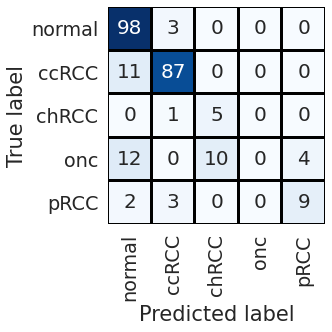

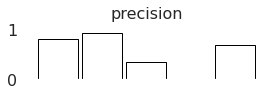

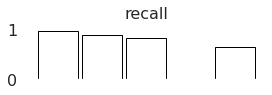

Accuracies are [0.8326530612244898, 0.8326530612244898, 0.8204081632653061, 0.8122448979591836]
Average acc is  0.8244897959183674
Average ROC AUC for each class: 


,ROC AUC
normal,0.969781
ccRCC,0.978221
chRCC,0.996339
oncocytoma,0.910169
pRCC,0.949521


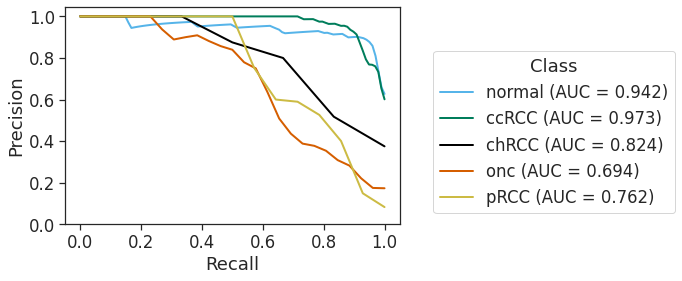

In [16]:
from sklearn.metrics import confusion_matrix
from Evaluate import plot_curve, plot_confusion_matrix
# now we can predict with each model
accs = []
roc_aucs = []
pr_aucs = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (diagnoses['overallpath'] == predictions).mean()
    accs.append(acc)
    
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'onc', 'pRCC']
#     pd.DataFrame(confusion_matrix(diagnoses['overallpath'], predictions), columns=cm_labels, index= cm_labels)
    plot_confusion_matrix(confusion_matrix(diagnoses['overallpath'], predictions), 'xgboost_multiclass', save_path = 'figs_xgboost_validation/Chopra_confusion_matrix_' + str(model_num) + '.svg', font_size = 36, cm_labels = cm_labels)
    
    if model_num == 3:
        make_and_save_precision_and_recall_bars(confusion_matrix(diagnoses['overallpath'], predictions), 'Chopra', 3)
    
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'onc', 'pRCC']
    colours = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"]
    roc_auc = plot_curve('roc', diagnoses['overallpath'], probs, len(cm_labels), cm_labels, colours, 'validation_Chopra' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    roc_aucs.append(roc_auc)
    
    pr_auc = plot_curve('precision_recall', diagnoses['overallpath'], probs, len(cm_labels), cm_labels, colours, 'validation_Chopra' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    pr_aucs.append(pr_auc)
    
print('Accuracies are', accs)
print('Average acc is ', np.mean(accs))
print('Average ROC AUC for each class: ')
pd.DataFrame(np.mean(roc_aucs, axis = 0), index = ['normal', 'ccRCC', 'chRCC', 'oncocytoma', 'pRCC'], columns = ['ROC AUC'])



In [30]:
dfs = []
# saving average precision, recall and F1 metrics 
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score, recall_score
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    precision = precision_score(diagnoses['overallpath'], predictions, average = None)
    recall = recall_score(diagnoses['overallpath'], predictions, average = None)
    f1 = f1_score(diagnoses['overallpath'], predictions, average = None)
    
    df = pd.DataFrame([precision, recall, f1], columns=['normal', 'ccRCC', 'chRCC', 'oncocytoma', 'pRCC'], index=['precision', 'recall', 'F1'])
    dfs.append(df)
    
dfs_mean = pd.concat(dfs).groupby(level=0).mean().loc[['precision', 'recall', 'F1']]
dfs_mean.round(3).to_latex(buf='figs_xgboost_validation/latex_class_wise_scores_Chopra.txt')
dfs_mean.round(3)

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid result

,normal,ccRCC,chRCC,oncocytoma,pRCC
precision,0.797,0.934,0.365,0.750,0.878
recall,0.973,0.893,0.958,0.048,0.661
F1,0.876,0.913,0.527,0.090,0.748


### Making and saving dataframes of incorrectly predicted samples

In [9]:
# getting dataframe of incorrect predictions
incorrect_preds_dfs = []

for model_num in range(4):
    incorrect_preds_df = diagnoses.iloc[:,2:]

    model = get_model(model_num)
    predictions = model.predict(met_array)

    incorrect_preds_df['pooled_labels'] = incorrect_preds_df['overallpath'] # is already pooled I think
    incorrect_preds_df['predictions'] = predictions
    incorrect_preds_df['correct'] = diagnoses['overallpath'] == predictions

    new_col_name = np.array(incorrect_preds_df.columns)
    new_col_name[0] = 'colname'
    incorrect_preds_df.columns = new_col_name

    incorrect_preds_df = incorrect_preds_df.loc[incorrect_preds_df['correct'] == False, :]

    incorrect_preds_df = incorrect_preds_df[['colname', 'overallpath', 'pooled_labels', 'predictions', 'correct']]
    
    incorrect_preds_df.to_csv('figs_xgboost_validation/incorrectly_predicted_Chopra_samples_model_' + str(model_num) + '.csv', index = False)
    incorrect_preds_dfs.append(incorrect_preds_df)
    
# and now for always wrong predictions
colnames = [incorrect_preds_dfs[i]['colname'] for i in range(4)]
colnames_always_wrong = set(colnames[0]).intersection(colnames[1]).intersection(colnames[2]).intersection(colnames[3])

incorrect_preds_df_always_wrong = diagnoses.iloc[:,2:]
incorrect_preds_df_always_wrong = incorrect_preds_df_always_wrong[incorrect_preds_df_always_wrong['id'].isin(colnames_always_wrong)]
incorrect_preds_df_always_wrong['pooled_labels'] = incorrect_preds_df_always_wrong['overallpath'] # is already pooled
incorrect_preds_df_always_wrong.columns = ['colname', 'overallpath', 'pooled_labels']
incorrect_preds_df_always_wrong.to_csv('figs_xgboost_validation/incorrectly_predicted_Chopra_samples_all_models_wrong.csv', index = False)

In [12]:
# which oncocytomas were classified as what?

oncs = diagnoses['overallpath'] == 3 # get oncocytomas

onc_diagnoses_and_preds = diagnoses[oncs]

for model_num in range(4):

    model = get_model(model_num)
    predictions = model.predict(met_array)

    onc_diagnoses_and_preds['prediction_model_' + str(model_num)] = predictions[oncs]

# making summaries:
summary = ['']* len(onc_diagnoses_and_preds)
print(summary)

all_pred_0 = (onc_diagnoses_and_preds.iloc[:, 4:9] == 0).mean(axis = 1) == 1
all_pred_2 = (onc_diagnoses_and_preds.iloc[:, 4:9] == 2).mean(axis = 1) == 1

summary = ['All models predicted normal' if p0 == True else 'All models predicted chromophobe' if p2 == True else '' for p0, p2 in zip(all_pred_0, all_pred_2)]
onc_diagnoses_and_preds['prediction_summary'] = summary


onc_diagnoses_and_preds = onc_diagnoses_and_preds.iloc[:, 2:]
onc_diagnoses_and_preds.to_csv('figs_xgboost_validation/Chopra_external_oncocytoma_predictions.csv', index = False)
onc_diagnoses_and_preds

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,overallpath,prediction_model_0,prediction_model_1,prediction_model_2,prediction_model_3,prediction_summary
14,8784241087_R01C01,3,0,0,0,0,All models predicted normal
29,8795194005_R06C01,3,0,0,0,0,All models predicted normal
31,8795194005_R02C02,3,0,0,0,0,All models predicted normal
32,8795194005_R03C02,3,0,0,0,0,All models predicted normal
42,8795194049_R01C02,3,0,0,0,0,All models predicted normal
43,8795194049_R02C02,3,0,0,0,0,All models predicted normal
68,8795194001_R04C01,3,0,0,0,0,All models predicted normal
69,8795194001_R05C01,3,2,2,2,2,All models predicted chromophobe
91,8795194089_R06C02,3,0,0,0,0,All models predicted normal
92,8795194091_R01C01,3,0,1,2,2,


### Chopra output probabilities for oncocytoma visualisation

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<AxesSubplot:>

<AxesSubplot:>

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later


<AxesSubplot:>

<AxesSubplot:>

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later


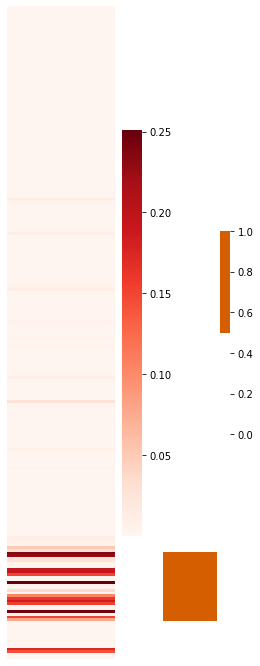

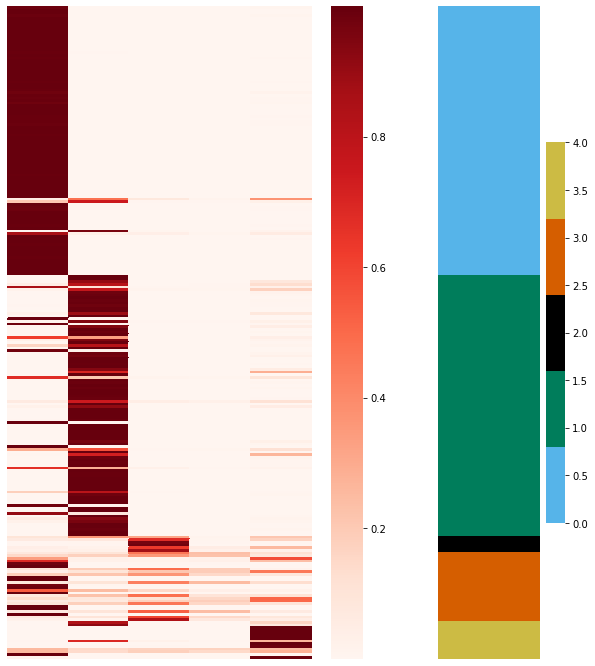

In [194]:
# showing oncocoytomas have higher output probabilities than non oncocytomas for Chopra external dataset

model = get_model(3)
predictions = model.predict(met_array)
probs = model.predict_proba(met_array)

# visualising just oncocytoma probabilities:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(4, 12), gridspec_kw={'width_ratios': [3, 1.5]})

# if we visualise the oncocytoma probabilities, we can see they are higher for oncocytomas (but not high enough to overthrow the other classes)
onc_probs_and_diagnoses = np.concatenate([np.round(probs[:,3:4], 3), np.array(diagnoses['overallpath'] == 3).reshape(-1, 1)], axis=1)

order = np.argsort(diagnoses['overallpath'])

import matplotlib.pyplot as plt
import seaborn as sb
sb.heatmap(probs[:,3:4][order], annot=False, cmap="Reds", linewidths=0, xticklabels=False, yticklabels=False, ax=ax1)
colours = ["white", "#D55E00"]
sb.heatmap((np.array(diagnoses['overallpath'] == 3).reshape(-1, 1)[order]), cmap = colours, linewidths=0, xticklabels=False, yticklabels=False, ax=ax2)
plt.savefig('figs_xgboost_validation/Chopra_output_probabilities_oncocytoma_model_3.pdf', rasterized=True) # using rasterrized=True due to this issue and solution: https://stackoverflow.com/a/27056296




# visualising all the probabilities:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 12), gridspec_kw={'width_ratios': [3, 1]})

to_plot = np.concatenate([np.array(diagnoses['overallpath']).reshape(-1, 1), probs], axis=1)
sb.heatmap(probs[order], cmap = plt.get_cmap('Reds'), linewidths=0, xticklabels=False, yticklabels=False, ax=ax1)
diagnoses_plot = list(diagnoses['overallpath'].astype(int))
colours = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"]
sb.heatmap(np.transpose([np.array(diagnoses_plot)[order]]), cmap = colours, linewidths=0, xticklabels=False, yticklabels=False, ax=ax2)
plt.savefig('figs_xgboost_validation/Chopra_output_probabilities_model_3.pdf', rasterized=True)



### Validation using external Stanford data (Brennan dataset)

In [31]:
# read in and process the data:
import pandas as pd
data = pd.read_csv('data/Brennandata/preprocessed_validation_beta.csv', sep = ',')

/home/in268/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
data

,Unnamed: 0,seqnames,start,X200397540076_R01C01,X200397540076_R02C01,X200397540076_R03C01,X200397540076_R04C01,X200397540076_R05C01,X200397540076_R06C01,X200397540076_R01C02,...,X200397540095_R04C01,X200397540095_R05C01,X200397540095_R06C01,X200397540095_R02C02,X200397540095_R04C02,X200397540095_R06C02,X200394970099_R01C01,X200394970099_R02C01,X200394970099_R03C01,X200394970099_R04C01
0,1,16,53434200,0.158318,0.401010,0.384772,0.472602,0.564093,0.464688,0.122640,...,0.222199,0.479634,0.436573,0.423912,0.432928,0.416627,0.436377,0.533541,0.707903,0.509117
1,2,6,25282551,0.945961,0.926721,0.915248,0.913901,0.902651,0.912171,0.927791,...,0.931017,0.922798,0.937930,0.920122,0.924961,0.910052,0.924845,0.938800,0.940347,0.933390
2,3,3,129183534,0.072688,0.071064,0.064574,0.066559,0.084004,0.072594,0.080231,...,0.061451,0.079275,0.070662,0.070849,0.071170,0.071945,0.053195,0.067841,0.056891,0.061132
3,4,12,123601930,0.058008,0.064516,0.050577,0.065640,0.054829,0.049763,0.070117,...,0.067048,0.063522,0.058754,0.054122,0.058445,0.053207,0.061052,0.036795,0.051025,0.040513
4,5,15,59493107,0.076947,0.062456,0.071408,0.053729,0.076335,0.062930,0.079230,...,0.070516,0.059100,0.056918,0.071315,0.053365,0.061930,0.075367,0.060222,0.051630,0.048710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,158666,2,227460160,0.031382,0.054655,0.018250,0.034518,0.013709,0.060488,0.016483,...,0.020909,0.020834,0.025734,0.013372,0.055925,0.031853,0.000000,0.000000,0.003070,0.053082
158666,158667,2,47206143,0.095561,0.254138,0.079308,0.207824,0.039778,0.279664,0.079534,...,0.066088,0.121254,0.133358,0.057503,0.270037,0.235928,0.018815,0.035549,0.031757,0.225663
158667,158668,2,65612270,0.037399,0.038465,0.025844,0.050808,0.025593,0.063056,0.026947,...,0.025545,0.020458,0.039505,0.026154,0.064966,0.049307,0.007743,0.016120,0.019552,0.049452
158668,158669,7,22665906,0.032876,0.036823,0.020338,0.021639,0.024005,0.037086,0.031310,...,0.023469,0.035327,0.040275,0.024069,0.029641,0.028056,0.009299,0.011198,0.016033,0.023517


In [33]:
seqnames = data['seqnames']
start = data['start']
colnames = data.columns[3:]

In [34]:
stanford_diagnoses = pd.read_csv('data/Brennandata/preprocessed_validation_diagnoses.csv')
mapping = {'Normal kidney parenchyma': 0, 'Clear cell RCC': 1, 'RCC-Chromophobe': 2, 'Oncocytoma': 3}
stanford_diagnoses['overallpath'] = [mapping[l] for l in stanford_diagnoses['Sample_Type']]

def deal_with_Inf(m_values_mat, extreme_val = 0):
    if extreme_val == 0:
        max_val = np.nanmax(m_values_mat[np.logical_not(np.isinf(m_values_mat))]) # looking at m values that arn't Inf
        min_val = np.nanmin(m_values_mat[np.logical_not(np.isinf(m_values_mat))])
    else:
        max_val = extreme_val
        min_val = -extreme_val
    print(max_val, min_val)
    indices = np.argwhere(np.isinf(m_values_mat)) # where m values is +/- Inf
    for i in range(len(indices)):
        if m_values_mat[indices[i][0], indices[i][1]] > 0:
            m_values_mat[indices[i][0], indices[i][1]] = max_val
        else:
            m_values_mat[indices[i][0], indices[i][1]] = min_val
    return m_values_mat

import numpy as np
data = np.array(data.iloc[:, 3:])
m_vals = np.log2((data)/(1-data)) # this will result in inf and -infs!
m_vals = deal_with_Inf(m_vals) # mirrors extreme vals of train/test set

# get into right shape
met_array = m_vals.transpose()
met_array.shape # rows are samples, columns are features
met_array

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2


14.12209999416731 -14.447212401572582


(37, 158670)

array([[ -2.41045349,   4.12970443,  -3.6732651 , ...,  -4.68587172,
         -4.87860855,  -5.57814967],
       [ -0.57889357,   3.6606687 ,  -3.70838959, ...,  -4.64370648,
         -4.70910215,  -4.94596848],
       [ -0.67711457,   3.43285103,  -3.85659065, ...,  -5.23622619,
         -5.59005142,  -5.04139492],
       ...,
       [  0.19385097,   3.93920297,  -3.78034858, ...,  -5.93155689,
         -6.46434214, -14.4472124 ],
       [  1.27710364,   3.97852499,  -4.05114465, ...,  -5.64802225,
         -5.93944819,  -9.42785291],
       [  0.05262082,   3.80866355,  -3.94093249, ...,  -4.26466665,
         -5.37583795,  -5.34755213]])

In [18]:
to_save = pd.DataFrame(np.transpose(met_array))
to_save.columns = colnames
to_save['seqnames'] = seqnames
to_save['start'] = start
to_save = to_save[['seqnames', 'start'] + list(colnames)] # putting seqnames and start at front

to_save.to_csv('data/Brennandata/preprocessed_validation_m_vals.csv')
to_save


,seqnames,start,X200397540076_R01C01,X200397540076_R02C01,X200397540076_R03C01,X200397540076_R04C01,X200397540076_R05C01,X200397540076_R06C01,X200397540076_R01C02,X200397540076_R02C02,...,X200397540095_R04C01,X200397540095_R05C01,X200397540095_R06C01,X200397540095_R02C02,X200397540095_R04C02,X200397540095_R06C02,X200394970099_R01C01,X200394970099_R02C01,X200394970099_R03C01,X200394970099_R04C01
0,16,53434200,-2.410453,-0.578894,-0.677115,-0.158265,0.371911,-0.204119,-2.838735,-0.429691,...,-1.807547,-0.117592,-0.368004,-0.442526,-0.389406,-0.485664,-0.369154,0.193851,1.277104,0.052621
1,6,25282551,4.129704,3.660669,3.432851,3.407971,3.212938,3.376535,3.683546,3.323414,...,3.754500,3.579304,3.917513,3.525948,3.623678,3.338777,3.621265,3.939203,3.978525,3.808664
2,3,129183534,-3.673265,-3.708390,-3.856591,-3.809850,-3.446806,-3.675274,-3.519044,-3.599248,...,-3.932931,-3.537837,-3.717203,-3.713104,-3.706082,-3.689242,-4.153712,-3.780349,-4.051145,-3.940932
3,12,123601930,-4.021386,-3.857981,-4.230512,-3.831333,-4.107561,-4.255137,-3.729211,-3.689937,...,-3.798526,-3.881928,-4.001825,-4.127378,-4.009893,-4.153360,-3.942944,-4.710243,-4.217106,-4.565820
4,15,59493107,-3.584482,-3.907965,-3.700879,-4.138469,-3.596958,-3.896326,-3.538724,-3.680449,...,-3.720414,-3.992819,-4.050417,-3.702919,-4.148852,-3.920989,-3.616875,-3.963970,-4.199160,-4.287580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,2,227460160,-4.947927,-4.112420,-5.749383,-4.805810,-6.168768,-3.957192,-5.898936,-4.095730,...,-5.549222,-5.554545,-5.242586,-6.205258,-4.077343,-4.925744,-14.447212,-14.447212,-8.343115,-4.156953
158666,2,47206143,-3.242523,-1.553299,-3.537180,-1.930454,-4.593313,-1.364972,-3.532724,-1.652470,...,-3.820834,-2.857408,-2.700132,-4.034783,-1.434667,-1.695359,-5.704586,-4.761812,-4.930239,-1.778788
158667,2,65612270,-4.685872,-4.643706,-5.236226,-4.223567,-5.250722,-3.893258,-5.174308,-4.226024,...,-5.253506,-5.581381,-4.603669,-5.218599,-3.847272,-4.269114,-7.001730,-5.931557,-5.648022,-4.264667
158668,7,22665906,-4.878609,-4.709102,-5.590051,-5.498680,-5.345451,-4.698470,-4.951359,-4.713213,...,-5.378853,-4.771209,-4.574654,-5.341521,-5.032849,-5.114496,-6.735307,-6.464342,-5.939448,-5.375838


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid result

[1.0, 1.0, 0.75, 0.25]


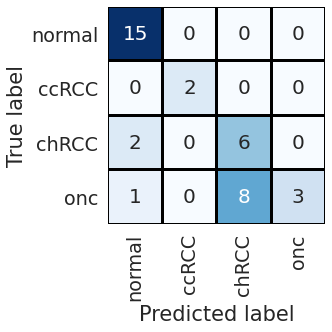

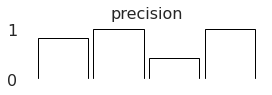

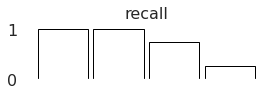

Accuracies are [0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027]
Average acc is  0.7027027027027027
Average ROC AUC for each class: 


,ROC AUC
normal,0.975758
ccRCC,1.000000
chRCC,0.904095
oncocytoma,0.947500


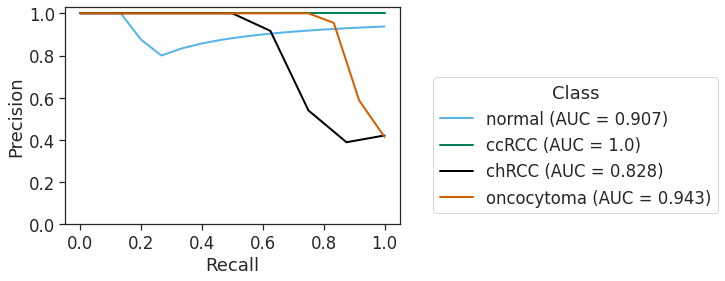

In [35]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from Evaluate import plot_curve, plot_confusion_matrix
# now we can predict with each model
accs = []
mccs = []
roc_aucs = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (stanford_diagnoses['overallpath'] == predictions).mean()
    accs.append(acc)
    mcc = matthews_corrcoef(stanford_diagnoses['overallpath'], predictions)
    mccs.append(mcc)
    
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'onc']
    plot_confusion_matrix(confusion_matrix(stanford_diagnoses['overallpath'], predictions), 'xgboost_multiclass', save_path = 'figs_xgboost_validation/stanford_confusion_matrix_' + str(model_num) + '.svg', font_size = 36, cm_labels = cm_labels)
    
    if model_num == 3:
        make_and_save_precision_and_recall_bars(confusion_matrix(stanford_diagnoses['overallpath'], predictions), 'Stanford', 3, xticks=[0,1,2,3])
    
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'oncocytoma']
    colours = ["#56B4E9", "#007d5b", "#000000", "#D55E00"]
    roc_auc = plot_curve('roc', stanford_diagnoses['overallpath'], probs[:,0:4], len(cm_labels), cm_labels, colours, 'validation_stanford' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    roc_aucs.append(roc_auc)
    
    pr_auc = plot_curve('precision_recall', stanford_diagnoses['overallpath'], probs[:,0:4], len(cm_labels), cm_labels, colours, 'validation_stanford' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    pr_aucs.append(pr_auc)
    
print('Accuracies are', accs)
print('Average acc is ', np.mean(accs))
print('Average ROC AUC for each class: ')
pd.DataFrame(np.mean(roc_aucs, axis = 0), index = ['normal', 'ccRCC', 'chRCC', 'oncocytoma'], columns = ['ROC AUC'])


In [36]:
# plotting precision, recall and F1 metrics 
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score, recall_score
dfs = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    precision = precision_score(stanford_diagnoses['overallpath'], predictions, average = None)
    recall = recall_score(stanford_diagnoses['overallpath'], predictions, average = None)
    f1 = f1_score(stanford_diagnoses['overallpath'], predictions, average = None)
    
    df = pd.DataFrame([precision, recall, f1], columns=['normal', 'ccRCC', 'chRCC', 'oncocytoma'], index=['precision', 'recall', 'F1'])
    dfs.append(df)

dfs_mean = pd.concat(dfs).groupby(level=0).mean().loc[['precision', 'recall', 'F1']]
dfs_mean.round(3).to_latex(buf='figs_xgboost_validation/latex_class_wise_scores_Stanford.txt')
dfs_mean.round(3)

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid result

,normal,ccRCC,chRCC,oncocytoma
precision,0.822,0.833,0.455,1.00
recall,1.000,1.000,0.750,0.25
F1,0.902,0.900,0.566,0.40


### Making and saving dataframes of incorrectly predicted samples

In [14]:
# getting dataframe of incorrect predictions
incorrect_preds_dfs = []

for model_num in range(4):
    incorrect_preds_df = stanford_diagnoses.iloc[:,1:]

    model = get_model(model_num)
    predictions = model.predict(met_array)

    incorrect_preds_df['pooled_labels'] = incorrect_preds_df['overallpath'] # is already pooled
    incorrect_preds_df['predictions'] = predictions
    incorrect_preds_df['correct'] = stanford_diagnoses['overallpath'] == predictions
    
    
    new_col_name = np.array(incorrect_preds_df.columns)
    new_col_name[0] = 'colname'
    incorrect_preds_df.columns = new_col_name

    incorrect_preds_df = incorrect_preds_df.loc[incorrect_preds_df['correct'] == False, :]

    incorrect_preds_df = incorrect_preds_df[['colname', 'overallpath', 'pooled_labels', 'predictions', 'correct']]
    
    incorrect_preds_df.to_csv('figs_xgboost_validation/incorrectly_predicted_Stanford_samples_model_' + str(model_num) + '.csv', index = False)
    incorrect_preds_dfs.append(incorrect_preds_df)
    
# and now for always wrong predictions
colnames = [incorrect_preds_dfs[i]['colname'] for i in range(4)]
colnames_always_wrong = set(colnames[0]).intersection(colnames[1]).intersection(colnames[2]).intersection(colnames[3])

incorrect_preds_df_always_wrong = stanford_diagnoses.iloc[:,1:]
incorrect_preds_df_always_wrong = incorrect_preds_df_always_wrong[incorrect_preds_df_always_wrong['X'].isin(colnames_always_wrong)]
incorrect_preds_df_always_wrong['pooled_labels'] = incorrect_preds_df_always_wrong['overallpath'] # is already pooled

incorrect_preds_df_always_wrong.columns = ['colname', 'Sample_Type', 'overallpath', 'pooled_labels']
incorrect_preds_df_always_wrong = incorrect_preds_df_always_wrong[['colname', 'overallpath', 'pooled_labels']]
incorrect_preds_df_always_wrong.to_csv('figs_xgboost_validation/incorrectly_predicted_Stanford_samples_all_models_wrong.csv', index = False)


### Do we get the same samples wrong as Stanford?

In their paper their model (trained on this same data, using 10-fold CV) misclassifies 3 samples with lower tumour purity as normal:
- chRCC_1 (200397540076_R05C02)
- chRCC_17 (200397540095_R06C01)
- oncocytoma_21 (200397540095_R03C01)

(I have got the sample names by hand using the Stanford clinical data csv)
Do we also get these samples wrong?

In [20]:
stanford_diagnoses['stanford_misclassified'] = stanford_diagnoses['X'].isin(['200397540076_R05C02', '200397540095_R06C01', '200397540095_R03C01'])
stanford_diagnoses

,Unnamed: 0,X,Sample_Type,overallpath,stanford_misclassified
0,1,200397540076_R01C01,Oncocytoma,3,False
1,2,200397540076_R02C01,Normal kidney parenchyma,0,False
2,3,200397540076_R03C01,Oncocytoma,3,False
3,4,200397540076_R04C01,Normal kidney parenchyma,0,False
4,5,200397540076_R05C01,Oncocytoma,3,False
5,6,200397540076_R06C01,Normal kidney parenchyma,0,False
6,7,200397540076_R01C02,RCC-Chromophobe,2,False
7,8,200397540076_R02C02,Normal kidney parenchyma,0,False
8,9,200397540076_R03C02,RCC-Chromophobe,2,False
9,10,200397540076_R04C02,Normal kidney parenchyma,0,False


In [21]:
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)

    we_misclassified = stanford_diagnoses['overallpath'] != predictions

    # for the ones stanford misclassified, did we also misclassify?
    we_misclassified[stanford_diagnoses['stanford_misclassified']]
    # yes, all models did!

10    True
26    True
29    True
Name: overallpath, dtype: bool

10    True
26    True
29    True
Name: overallpath, dtype: bool

10    True
26    True
29    True
Name: overallpath, dtype: bool

10    True
26    True
29    True
Name: overallpath, dtype: bool

### Validation using external GSE61441 data

In [37]:
# read in and process the data:
import pandas as pd
data = pd.read_csv('data/Wei_external/preprocessed_validation_beta.csv', sep = ',')
GSE_diagnoses = pd.read_csv('data/Wei_external/preprocessed_validation_diagnoses.csv')
mapping = {'Normal': 0, 'KIRC': 1}
GSE_diagnoses['overallpath'] = [mapping[l] for l in GSE_diagnoses['label']]


/home/in268/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
data

,Unnamed: 0,seqnames,start,X2014ccRCC01T,X2014ccRCC01N,X2014ccRCC02T,X2014ccRCC02N,X2014ccRCC03T,X2014ccRCC03N,X2014ccRCC04T,...,X2014ccRCC42T,X2014ccRCC42N,X2014ccRCC43T,X2014ccRCC43N,X2014ccRCC44T,X2014ccRCC44N,X2014ccRCC45T,X2014ccRCC45N,X2014ccRCC46T,X2014ccRCC46N
0,1,16,53434200,0.459828,0.618223,0.588827,0.603949,0.491516,0.592811,0.732985,...,0.378067,0.554054,0.786227,0.645539,0.707545,0.490215,0.476631,0.534257,0.565777,0.546406
1,2,6,25282551,0.915280,0.925202,0.910213,0.918889,0.897512,0.910341,0.927332,...,0.930443,0.918335,0.914275,0.934736,0.908607,0.913068,0.892464,0.897125,0.924000,0.911549
2,3,3,129183534,0.148832,0.153479,0.140938,0.157000,0.129401,0.143093,0.152527,...,0.145413,0.136521,0.125000,0.141798,0.139165,0.121527,0.127092,0.126852,0.144656,0.143735
3,4,12,123601930,0.069070,0.067621,0.083069,0.081745,0.060344,0.074705,0.065502,...,0.070734,0.059439,0.068820,0.052683,0.070952,0.080394,0.083543,0.079420,0.091132,0.076234
4,5,15,59493107,0.171040,0.177342,0.181162,0.177765,0.176817,0.164438,0.170660,...,0.155811,0.141539,0.144094,0.177047,0.128263,0.148760,0.143374,0.108148,0.141286,0.143969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,158666,2,227460160,0.108322,0.162983,0.120006,0.163934,0.130524,0.139947,0.104271,...,0.100228,0.120542,0.118582,0.155956,0.108959,0.147481,0.141347,0.103565,0.084840,0.145883
158666,158667,2,47206143,0.107814,0.341334,0.227407,0.389961,0.145352,0.363196,0.149774,...,0.409276,0.329406,0.111851,0.331162,0.145415,0.357855,0.242820,0.306486,0.100581,0.378390
158667,158668,2,65612270,0.081134,0.132498,0.095637,0.109615,0.075891,0.102004,0.082410,...,0.143270,0.103666,0.072725,0.109917,0.060855,0.109325,0.084968,0.100192,0.092606,0.108127
158668,158669,7,22665906,0.090921,0.088646,0.079518,0.091850,0.075470,0.092225,0.073256,...,0.136582,0.073907,0.064532,0.079892,0.068643,0.100348,0.085364,0.074470,0.071519,0.091372


In [39]:
seqnames = data['seqnames']
start = data['start']
colnames = data.columns[3:]

In [40]:
import numpy as np
data = np.array(data.iloc[:, 3:])
m_vals = np.log2((data)/(1-data)) # this will result in inf and -infs!
m_vals = deal_with_Inf(m_vals) # mirrors extreme vals of train/test set

# get into right shape
met_array = m_vals.transpose()
met_array.shape # rows are samples, columns are features
met_array

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


6.6559877973427035 -6.822092774379531


(92, 158670)

array([[-0.2323274 ,  3.43343947, -2.51575859, ..., -3.50147957,
        -3.32171435, -2.03730974],
       [ 0.69539985,  3.62869474, -2.46350398, ..., -2.71089772,
        -3.36188236, -2.34342503],
       [ 0.5180985 ,  3.34162521, -2.60769845, ..., -3.24125579,
        -3.53304321, -2.37352422],
       ...,
       [ 0.19800139,  3.12441879, -2.78308338, ..., -3.166855  ,
        -3.63554998, -2.63159683],
       [ 0.38179698,  3.6038268 , -2.56387745, ..., -3.29254766,
        -3.69846784, -2.40885339],
       [ 0.26857259,  3.36536546, -2.57465092, ..., -3.04410566,
        -3.31386496, -2.60312468]])

In [33]:
# and save processed version:
to_save = pd.DataFrame(np.transpose(met_array))
to_save.columns = colnames
to_save['seqnames'] = seqnames
to_save['start'] = start
to_save = to_save[['seqnames', 'start'] + list(colnames)] # putting seqnames and start at front

to_save.to_csv('data/Wei_external/preprocessed_validation_m_vals.csv')
to_save

,seqnames,start,X2014ccRCC01T,X2014ccRCC01N,X2014ccRCC02T,X2014ccRCC02N,X2014ccRCC03T,X2014ccRCC03N,X2014ccRCC04T,X2014ccRCC04N,...,X2014ccRCC42T,X2014ccRCC42N,X2014ccRCC43T,X2014ccRCC43N,X2014ccRCC44T,X2014ccRCC44N,X2014ccRCC45T,X2014ccRCC45N,X2014ccRCC46T,X2014ccRCC46N
0,16,53434200,-0.232327,0.695400,0.518098,0.608742,-0.048962,0.541874,1.456862,0.698406,...,-0.718118,0.313158,1.878866,0.864879,1.274609,-0.056472,-0.134958,0.198001,0.381797,0.268573
1,6,25282551,3.433439,3.628695,3.341625,3.501931,3.130481,3.343890,3.673704,3.934717,...,3.741646,3.491227,3.414842,3.840208,3.313499,3.392770,3.052968,3.124419,3.603827,3.365365
2,3,129183534,-2.515759,-2.463504,-2.607698,-2.424768,-2.750161,-2.582185,-2.474106,-2.556900,...,-2.555072,-2.661035,-2.807355,-2.597485,-2.628935,-2.853720,-2.779960,-2.783083,-2.563877,-2.574651
3,12,123601930,-3.752542,-3.785375,-3.464433,-3.489690,-3.960840,-3.630636,-3.834591,-3.819587,...,-3.715612,-3.984042,-3.758152,-4.168427,-3.710846,-3.515859,-3.455471,-3.534959,-3.318042,-3.599026
4,15,59493107,-2.276966,-2.213763,-2.176299,-2.209578,-2.218956,-2.345199,-2.280841,-2.572007,...,-2.437773,-2.600555,-2.570438,-2.216675,-2.764791,-2.516576,-2.578879,-3.043791,-2.603559,-2.571902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,2,227460160,-3.041192,-2.360535,-2.874393,-2.350497,-2.735834,-2.619544,-3.102725,-2.462101,...,-3.166271,-2.867079,-2.893938,-2.436178,-3.031714,-2.531202,-2.602834,-3.113663,-3.431213,-2.549623
158666,2,47206143,-3.048798,-0.948363,-1.764430,-0.645574,-2.555784,-0.810100,-2.505056,-0.512707,...,-0.529409,-1.025573,-2.989222,-1.014120,-2.555049,-0.843524,-1.640748,-1.178104,-3.160638,-0.716136
158667,2,65612270,-3.501480,-2.710898,-3.241256,-3.021991,-3.606066,-3.138080,-3.476949,-2.606448,...,-2.580106,-3.112098,-3.672469,-3.017531,-3.947889,-3.026274,-3.428823,-3.166855,-3.292548,-3.044106
158668,7,22665906,-3.321714,-3.361882,-3.533043,-3.305584,-3.614737,-3.299105,-3.661142,-3.245543,...,-2.660298,-3.647373,-3.857605,-3.525675,-3.762149,-3.164355,-3.421505,-3.635550,-3.698468,-3.313865


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid result

[0.9782608695652174, 0.8043478260869565, 0, 0, 0]


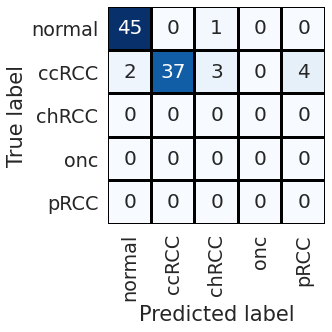

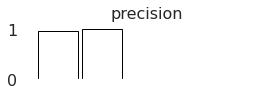

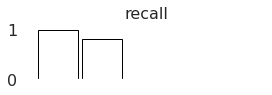

Accuracies are [0.8586956521739131, 0.8804347826086957, 0.8695652173913043, 0.8913043478260869]
Average acc is  0.875
Average ROC AUC for each class: 


,ROC AUC
normal,0.996574
ccRCC,0.987949


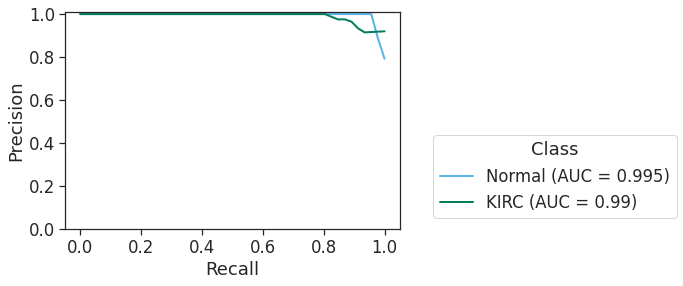

In [41]:
from sklearn.metrics import confusion_matrix
from Evaluate import plot_curve, plot_confusion_matrix
# now we can predict with each model
accs = []
roc_aucs = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (GSE_diagnoses['overallpath'] == predictions).mean()
    accs.append(acc)
    
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'onc', 'pRCC']
    plot_confusion_matrix(confusion_matrix(GSE_diagnoses['overallpath'], predictions, labels = [0, 1, 2, 3, 4]), 'xgboost_multiclass', save_path = 'figs_xgboost_validation/GSE61441_confusion_matrix_' + str(model_num) + '.svg', font_size = 36, cm_labels = cm_labels)
    
    if model_num == 3:
        make_and_save_precision_and_recall_bars(confusion_matrix(GSE_diagnoses['overallpath'], predictions, labels = [0, 1, 2, 3, 4]), 'GSE61441', 3, xticks=[0,1,2,3,4])
        
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'oncocytoma', 'pRCC']
    colours = ["#56B4E9", "#007d5b"]
    cm_labels = ['Normal', 'KIRC']
    roc_auc = plot_curve('roc', GSE_diagnoses['overallpath'], probs[:, 0:2], len(cm_labels), cm_labels, colours, 'validation_GSE61441' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    roc_aucs.append(roc_auc)
    
    pr_auc = plot_curve('precision_recall', GSE_diagnoses['overallpath'], probs[:, 0:2], len(cm_labels), cm_labels, colours, 'validation_GSE61441' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    pr_aucs.append(pr_auc)
    
    # NOTE: the ROC AUCs and ROC curves are a bit misleading, as they only consider the classes 0 and 1!
    # Ie, can the models tell class 0 from everything else, and can the models tell class 1 from everything else

print('Accuracies are', accs)
print('Average acc is ', np.mean(accs))
print('Average ROC AUC for each class: ')
pd.DataFrame(np.mean(roc_aucs, axis = 0), index = ['normal', 'ccRCC'], columns = ['ROC AUC'])


In [42]:
# plotting precision, recall and F1 metrics 
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score, recall_score
dfs = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    precision = precision_score(GSE_diagnoses['overallpath'], predictions, average = None)
    recall = recall_score(GSE_diagnoses['overallpath'], predictions, average = None)
    f1 = f1_score(GSE_diagnoses['overallpath'], predictions, average = None)
    
    df = pd.DataFrame([precision, recall, f1], columns=['normal', 'ccRCC', 'chRCC', 'oncocytoma'], index=['precision', 'recall', 'F1'])
    dfs.append(df)
    
dfs_mean = pd.concat(dfs).groupby(level=0).mean().loc[['precision', 'recall', 'F1']]
dfs_mean.round(3).to_latex(buf='figs_xgboost_validation/latex_class_wise_scores_Wei.txt')
dfs_mean.round(3)

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samp

,normal,ccRCC,chRCC,oncocytoma
precision,0.942,0.993,0.0,0.0
recall,0.978,0.772,0.0,0.0
F1,0.960,0.868,0.0,0.0


### Making and saving dataframes of incorrectly predicted samples

In [19]:
# getting dataframe of incorrect predictions
incorrect_preds_dfs = []

for model_num in range(4):
    incorrect_preds_df = GSE_diagnoses.iloc[:,1:]

    model = get_model(model_num)
    predictions = model.predict(met_array)

    incorrect_preds_df['pooled_labels'] = incorrect_preds_df['overallpath'] # is already pooled
    incorrect_preds_df['predictions'] = predictions
    incorrect_preds_df['correct'] = GSE_diagnoses['overallpath'] == predictions
    
    new_col_name = np.array(incorrect_preds_df.columns)
    new_col_name[0] = 'colname'
    incorrect_preds_df.columns = new_col_name

    incorrect_preds_df = incorrect_preds_df.loc[incorrect_preds_df['correct'] == False, :]

    incorrect_preds_df = incorrect_preds_df[['colname', 'overallpath', 'pooled_labels', 'predictions', 'correct']]
    
    incorrect_preds_df.to_csv('figs_xgboost_validation/incorrectly_predicted_GSE61441_samples_model_' + str(model_num) + '.csv', index = False)
    incorrect_preds_dfs.append(incorrect_preds_df)
    
# and now for always wrong predictions
colnames = [incorrect_preds_dfs[i]['colname'] for i in range(4)]
colnames_always_wrong = set(colnames[0]).intersection(colnames[1]).intersection(colnames[2]).intersection(colnames[3])

incorrect_preds_df_always_wrong = GSE_diagnoses.iloc[:,1:]
incorrect_preds_df_always_wrong = incorrect_preds_df_always_wrong[incorrect_preds_df_always_wrong['sample_id'].isin(colnames_always_wrong)]
incorrect_preds_df_always_wrong['pooled_labels'] = incorrect_preds_df_always_wrong['overallpath'] # is already pooled
incorrect_preds_df_always_wrong.columns = ['colname', 'label', 'overallpath', 'pooled_labels']
incorrect_preds_df_always_wrong = incorrect_preds_df_always_wrong[['colname', 'overallpath', 'pooled_labels']]
incorrect_preds_df_always_wrong.to_csv('figs_xgboost_validation/incorrectly_predicted_GSE61441_samples_all_models_wrong.csv', index = False)


,sample_id,label,overallpath,pooled_labels
12,2014ccRCC07T,KIRC,1,1
24,2014ccRCC13T,KIRC,1,1
32,2014ccRCC17T,KIRC,1,1
39,2014ccRCC20N,Normal,0,0
40,2014ccRCC21T,KIRC,1,1
52,2014ccRCC27T,KIRC,1,1
58,2014ccRCC30T,KIRC,1,1
80,2014ccRCC41T,KIRC,1,1
88,2014ccRCC45T,KIRC,1,1


# Validation using Evelonn data

In [43]:
import pandas as pd
data = pd.read_csv('data/Evelonn_external/preprocessed_validation_beta_from_normalised_data.csv', sep = ',', index_col=0)
diagnoses = pd.read_csv('data/Evelonn_external/preprocessed_validation_beta_diagnoses_from_normalised_data.csv')

data

colnames = data.columns

mapping = {'Normal': 0, 'ccRCC': 1}
diagnoses['overallpath'] = [mapping[l] for l in diagnoses['diagnosis']]

import numpy as np

data = np.array(data)
m_vals = np.log2((data)/(1-data)) # this will result in inf and -infs!
m_vals = deal_with_Inf(m_vals) # mirrors extreme vals of train/test set
# m_vals

# get into right shape
met_array = m_vals.transpose()
met_array.shape # rows are samples, columns are features
met_array

,GSM3107981,GSM3107982,GSM3107983,GSM3107984,GSM3107985,GSM3107986,GSM3107987,GSM3107988,GSM3107989,GSM3107990,...,GSM3108115,GSM3108116,GSM3108117,GSM3108118,GSM3108119,GSM3108120,GSM3108121,GSM3108122,GSM3108123,GSM3108124
cg00000029,0.576638,0.674810,0.465406,0.791434,0.590961,0.465131,0.434175,0.565159,0.714463,0.670467,...,0.472254,0.441049,0.652296,0.601056,0.675530,0.723523,0.678915,0.735999,0.132951,0.118339
cg00000721,0.954358,0.956178,0.963547,0.959798,0.952270,0.953844,0.954239,0.947641,0.946819,0.943989,...,0.902223,0.841495,0.941848,0.938772,0.936790,0.878116,0.875989,0.884559,0.926038,0.929339
cg00000734,0.060598,0.069621,0.080113,0.075663,0.079690,0.067366,0.075586,0.090323,0.069066,0.076681,...,0.071044,0.092766,0.075496,0.076951,0.071629,0.073737,0.087478,0.096316,0.079272,0.064725
cg00000769,0.098353,0.086744,0.084574,0.102646,0.108697,0.059454,0.073670,0.094939,0.084689,0.095134,...,0.072520,0.071895,0.093656,0.089176,0.092461,0.126235,0.121491,0.093233,0.102874,0.099737
cg00000905,0.072871,0.082488,0.093388,0.083684,0.085746,0.075207,0.101648,0.082527,0.100786,0.072275,...,0.290186,0.276311,0.103887,0.100828,0.113482,0.112433,0.109913,0.116092,0.164714,0.121993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.2.4554563R,0.049085,0.043165,0.041324,0.031718,0.036925,0.046726,0.041809,0.034204,0.043386,0.041802,...,0.091430,0.156445,0.048370,0.053463,0.075909,0.048275,0.053114,0.069340,0.099942,0.084024
ch.2.47286786F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.157786,0.161302,0.063601,0.083136,0.057933,0.070213,0.069609,0.068549,0.041433,0.047988
ch.2.65692908F,0.014963,0.018654,0.013735,0.015972,0.020207,0.026808,0.027886,0.027656,0.025921,0.026858,...,0.078463,0.118817,0.026618,0.029301,0.027897,0.041588,0.022285,0.028590,0.025587,0.031959
ch.7.22672050F,0.024011,0.018748,0.011374,0.017836,0.020664,0.045273,0.024098,0.022910,0.024541,0.012908,...,0.091033,0.142251,0.026580,0.034031,0.028875,0.026503,0.020470,0.031306,0.033178,0.032842


7.332507065023063 -7.974336137862869


(144, 158670)

array([[ 0.44577688,  4.38608686, -3.95440257, ..., -6.04070171,
        -5.34508741,         nan],
       [ 1.05319561,  4.4475654 , -3.7402189 , ..., -5.71721396,
        -5.70985011,         nan],
       [-0.19995262,  4.72423405, -3.5213518 , ..., -6.16601658,
        -6.44155315,         nan],
       ...,
       [ 1.47916306,  2.93779772, -3.22996531, ..., -5.08647914,
        -4.95152029, -3.33453159],
       [-2.70521486,  3.64620687, -3.53789941, ..., -5.25107572,
        -4.86495568, -2.70039006],
       [-2.89729977,  3.71722907, -3.85298696, ..., -4.92077409,
        -4.8801515 , -2.91016259]])

In [73]:
# and save processed version:
to_save = pd.DataFrame(np.transpose(met_array))

to_save.columns = colnames
probe_names_and_positions = pd.read_csv('data/training_testing_maxgap_50_newdata_processed_probe_names.csv')
seqnames_and_start = probe_names_and_positions[['seqnames', 'start']]

to_save = pd.concat([seqnames_and_start, to_save], axis=1) # add on seqnames and start 

to_save.to_csv('data/Evelonn_external/preprocessed_validation_m_vals_from_normalised_data.csv')
to_save

# also save beta values with concated seqnames and start
beta_values = pd.DataFrame(data, columns=colnames)
beta_values = pd.concat([seqnames_and_start, beta_values], axis=1) # add on seqnames and start 


beta_values.to_csv('data/Evelonn_external/preprocessed_validation_beta_vals_from_normalised_data_with_seqnames_and_start.csv')
beta_values

,GSM3107981,GSM3107982,GSM3107983,GSM3107984,GSM3107985,GSM3107986,GSM3107987,GSM3107988,GSM3107989,GSM3107990,...,GSM3108115,GSM3108116,GSM3108117,GSM3108118,GSM3108119,GSM3108120,GSM3108121,GSM3108122,GSM3108123,GSM3108124
0,0.445777,1.053196,-0.199953,1.923963,0.530827,-0.201547,-0.382081,0.378167,1.323179,1.024741,...,-0.160283,-0.341783,0.907670,0.591315,1.057932,1.387880,1.080279,1.479163,-2.705215,-2.897300
1,4.386087,4.447565,4.724234,4.577407,4.318411,4.369156,4.382151,4.177818,4.154117,4.074982,...,3.205919,2.408423,4.017603,3.938517,3.889494,2.848900,2.820438,2.937798,3.646207,3.717229
2,-3.954403,-3.740219,-3.521352,-3.610765,-3.529647,-3.791212,-3.612350,-3.332187,-3.752620,-3.589886,...,-3.708830,-3.289813,-3.614206,-3.584404,-3.696092,-3.650968,-3.382874,-3.229965,-3.537899,-3.852987
3,-3.196520,-3.396175,-3.436162,-3.128000,-3.035599,-3.983656,-3.652384,-3.252941,-3.434021,-3.249665,...,-3.676860,-3.690315,-3.274611,-3.352450,-3.295036,-2.791133,-2.854212,-3.281811,-3.124426,-3.174152
4,-3.669352,-3.475467,-3.279168,-3.452826,-3.414458,-3.620185,-3.143694,-3.474731,-3.157362,-3.682130,...,-1.290460,-1.389074,-3.108670,-3.156707,-2.965686,-2.980795,-3.017581,-2.928625,-2.342305,-2.847438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,-4.275970,-4.470333,-4.535974,-4.932074,-4.704971,-4.350595,-4.518431,-4.819475,-4.462646,-4.518697,...,-3.312857,-2.430822,-4.298223,-4.146055,-3.605700,-4.301203,-4.156031,-3.746491,-3.170851,-3.446440
158666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.416221,-2.378391,-3.880011,-3.463162,-4.023374,-3.727099,-3.740499,-3.764274,-4.532031,-4.310246
158667,-6.040702,-5.717214,-6.166017,-5.945106,-5.599586,-5.182002,-5.123492,-5.135804,-5.231873,-5.179218,...,-3.553961,-2.890701,-5.192529,-5.050024,-5.122932,-4.526424,-5.455266,-5.086479,-5.251076,-4.920774
158668,-5.345087,-5.709850,-6.441553,-5.783125,-5.566604,-4.398356,-5.339741,-5.414435,-5.312796,-6.256795,...,-3.319758,-2.592112,-5.194665,-4.827036,-5.071763,-5.198925,-5.580490,-4.951520,-4.864956,-4.880152


,seqnames,start
0,chr16,53434200
1,chr6,25282551
2,chr3,129183534
3,chr12,123601930
4,chr15,59493107
...,...,...
158665,chr2,227460160
158666,chr2,47206143
158667,chr2,65612270
158668,chr7,22665906


,seqnames,start,GSM3107981,GSM3107982,GSM3107983,GSM3107984,GSM3107985,GSM3107986,GSM3107987,GSM3107988,...,GSM3108115,GSM3108116,GSM3108117,GSM3108118,GSM3108119,GSM3108120,GSM3108121,GSM3108122,GSM3108123,GSM3108124
0,chr16,53434200,0.445777,1.053196,-0.199953,1.923963,0.530827,-0.201547,-0.382081,0.378167,...,-0.160283,-0.341783,0.907670,0.591315,1.057932,1.387880,1.080279,1.479163,-2.705215,-2.897300
1,chr6,25282551,4.386087,4.447565,4.724234,4.577407,4.318411,4.369156,4.382151,4.177818,...,3.205919,2.408423,4.017603,3.938517,3.889494,2.848900,2.820438,2.937798,3.646207,3.717229
2,chr3,129183534,-3.954403,-3.740219,-3.521352,-3.610765,-3.529647,-3.791212,-3.612350,-3.332187,...,-3.708830,-3.289813,-3.614206,-3.584404,-3.696092,-3.650968,-3.382874,-3.229965,-3.537899,-3.852987
3,chr12,123601930,-3.196520,-3.396175,-3.436162,-3.128000,-3.035599,-3.983656,-3.652384,-3.252941,...,-3.676860,-3.690315,-3.274611,-3.352450,-3.295036,-2.791133,-2.854212,-3.281811,-3.124426,-3.174152
4,chr15,59493107,-3.669352,-3.475467,-3.279168,-3.452826,-3.414458,-3.620185,-3.143694,-3.474731,...,-1.290460,-1.389074,-3.108670,-3.156707,-2.965686,-2.980795,-3.017581,-2.928625,-2.342305,-2.847438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,chr2,227460160,-4.275970,-4.470333,-4.535974,-4.932074,-4.704971,-4.350595,-4.518431,-4.819475,...,-3.312857,-2.430822,-4.298223,-4.146055,-3.605700,-4.301203,-4.156031,-3.746491,-3.170851,-3.446440
158666,chr2,47206143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.416221,-2.378391,-3.880011,-3.463162,-4.023374,-3.727099,-3.740499,-3.764274,-4.532031,-4.310246
158667,chr2,65612270,-6.040702,-5.717214,-6.166017,-5.945106,-5.599586,-5.182002,-5.123492,-5.135804,...,-3.553961,-2.890701,-5.192529,-5.050024,-5.122932,-4.526424,-5.455266,-5.086479,-5.251076,-4.920774
158668,chr7,22665906,-5.345087,-5.709850,-6.441553,-5.783125,-5.566604,-4.398356,-5.339741,-5.414435,...,-3.319758,-2.592112,-5.194665,-4.827036,-5.071763,-5.198925,-5.580490,-4.951520,-4.864956,-4.880152


,seqnames,start,GSM3107981,GSM3107982,GSM3107983,GSM3107984,GSM3107985,GSM3107986,GSM3107987,GSM3107988,...,GSM3108115,GSM3108116,GSM3108117,GSM3108118,GSM3108119,GSM3108120,GSM3108121,GSM3108122,GSM3108123,GSM3108124
0,chr16,53434200,0.576638,0.674810,0.465406,0.791434,0.590961,0.465131,0.434175,0.565159,...,0.472254,0.441049,0.652296,0.601056,0.675530,0.723523,0.678915,0.735999,0.132951,0.118339
1,chr6,25282551,0.954358,0.956178,0.963547,0.959798,0.952270,0.953844,0.954239,0.947641,...,0.902223,0.841495,0.941848,0.938772,0.936790,0.878116,0.875989,0.884559,0.926038,0.929339
2,chr3,129183534,0.060598,0.069621,0.080113,0.075663,0.079690,0.067366,0.075586,0.090323,...,0.071044,0.092766,0.075496,0.076951,0.071629,0.073737,0.087478,0.096316,0.079272,0.064725
3,chr12,123601930,0.098353,0.086744,0.084574,0.102646,0.108697,0.059454,0.073670,0.094939,...,0.072520,0.071895,0.093656,0.089176,0.092461,0.126235,0.121491,0.093233,0.102874,0.099737
4,chr15,59493107,0.072871,0.082488,0.093388,0.083684,0.085746,0.075207,0.101648,0.082527,...,0.290186,0.276311,0.103887,0.100828,0.113482,0.112433,0.109913,0.116092,0.164714,0.121993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,chr2,227460160,0.049085,0.043165,0.041324,0.031718,0.036925,0.046726,0.041809,0.034204,...,0.091430,0.156445,0.048370,0.053463,0.075909,0.048275,0.053114,0.069340,0.099942,0.084024
158666,chr2,47206143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.157786,0.161302,0.063601,0.083136,0.057933,0.070213,0.069609,0.068549,0.041433,0.047988
158667,chr2,65612270,0.014963,0.018654,0.013735,0.015972,0.020207,0.026808,0.027886,0.027656,...,0.078463,0.118817,0.026618,0.029301,0.027897,0.041588,0.022285,0.028590,0.025587,0.031959
158668,chr7,22665906,0.024011,0.018748,0.011374,0.017836,0.020664,0.045273,0.024098,0.022910,...,0.091033,0.142251,0.026580,0.034031,0.028875,0.026503,0.020470,0.031306,0.033178,0.032842


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2])

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2])

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2])

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

Accuracies are [0.8402777777777778, 0.9166666666666666, 0.9027777777777778, 0.9166666666666666]
Average acc is  0.8940972222222222


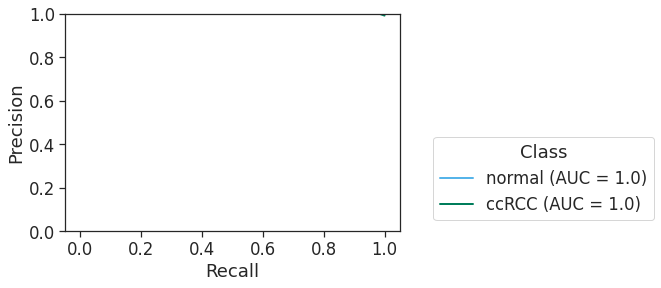

In [44]:

from sklearn.metrics import confusion_matrix, matthews_corrcoef
from Evaluate import plot_curve, plot_confusion_matrix
# now we can predict with each model
accs = []
mccs = []
roc_aucs = []
pr_aucs = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    predictions
    probs = model.predict_proba(met_array)
    acc = (diagnoses['overallpath'] == predictions).mean()
    accs.append(acc)
    mcc = matthews_corrcoef(diagnoses['overallpath'], predictions)
    mccs.append(mcc)
    
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'onc', 'pRCC']
    plot_confusion_matrix(confusion_matrix(diagnoses['overallpath'], predictions, labels=[0,1,2,3,4]), 'xgboost_multiclass', save_path = 'figs_xgboost_validation/evelonn_confusion_matrix_' + str(model_num) + '.svg', font_size = 36, cm_labels = cm_labels)
    
#     if model_num == 3:
#         make_and_save_precision_and_recall_bars(confusion_matrix(diagnoses['overallpath'], predictions), 'Evelonn', 3, xticks=[0,1,2])
    
    cm_labels = ['normal', 'ccRCC']
    colours = ["#56B4E9", "#007d5b"]
    roc_auc = plot_curve('roc', diagnoses['overallpath'], probs[:,0:2], len(cm_labels), cm_labels, colours, 'validation_Evelonn' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    roc_aucs.append(roc_auc)
    
    pr_auc = plot_curve('precision_recall', diagnoses['overallpath'], probs[:,0:2], len(cm_labels), cm_labels, colours, 'validation_Evelonn' + '_' + str(model_num), save_folder = 'figs_xgboost_validation/')
    pr_aucs.append(pr_auc)
    
print('Accuracies are', accs)
print('Average acc is ', np.mean(accs))


In [47]:
# plotting precision, recall and F1 metrics 
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score, recall_score
dfs = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    precision = precision_score(diagnoses['overallpath'], predictions, average = None)
    recall = recall_score(diagnoses['overallpath'], predictions, average = None)
    f1 = f1_score(diagnoses['overallpath'], predictions, average = None)
    
    df = pd.DataFrame([precision, recall, f1], columns=['normal', 'ccRCC', 'chRCC', 'oncocytoma'], index=['precision', 'recall', 'F1'])
    dfs.append(df)
    
dfs_mean = pd.concat(dfs).groupby(level=0).mean().loc[['precision', 'recall', 'F1']]
dfs_mean.round(3).to_latex(buf='figs_xgboost_validation/latex_class_wise_scores_Evelonn.txt')
dfs_mean.round(3)

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,normal,ccRCC,chRCC,oncocytoma
precision,1.0,1.000000,0.0,0.0
recall,1.0,0.825758,0.0,0.0
F1,1.0,0.904564,0.0,0.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,normal,ccRCC,chRCC,oncocytoma
precision,1.0,1.000000,0.0,0.0
recall,1.0,0.909091,0.0,0.0
F1,1.0,0.952381,0.0,0.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,normal,ccRCC,chRCC,oncocytoma
precision,1.0,1.000000,0.0,0.0
recall,1.0,0.893939,0.0,0.0
F1,1.0,0.944000,0.0,0.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,normal,ccRCC,chRCC,oncocytoma
precision,1.0,1.000000,0.0,0.0
recall,1.0,0.909091,0.0,0.0
F1,1.0,0.952381,0.0,0.0


,normal,ccRCC,chRCC,oncocytoma
precision,1.0,1.000,0.0,0.0
recall,1.0,0.884,0.0,0.0
F1,1.0,0.938,0.0,0.0


### Make and save incorrect prediction csv

In [57]:
# getting dataframe of incorrect predictions
incorrect_preds_dfs = []

for model_num in range(4):
    incorrect_preds_df = diagnoses.iloc[:,1:]

    model = get_model(model_num)
    predictions = model.predict(met_array)

    incorrect_preds_df['pooled_labels'] = incorrect_preds_df['overallpath'] # is already pooled
    incorrect_preds_df['predictions'] = predictions
    incorrect_preds_df['correct'] = diagnoses['overallpath'] == predictions
    
    new_col_name = np.array(incorrect_preds_df.columns)
    new_col_name[0] = 'colname'
    incorrect_preds_df.columns = new_col_name

    incorrect_preds_df = incorrect_preds_df.loc[incorrect_preds_df['correct'] == False, :]

    incorrect_preds_df = incorrect_preds_df[['colname', 'name', 'overallpath', 'pooled_labels', 'predictions', 'correct']]
    incorrect_preds_df
#     incorrect_preds_df['colname']
    incorrect_preds_df.to_csv('figs_xgboost_validation/incorrectly_predicted_Evelonn_samples_model_' + str(model_num) + '.csv', index = False)
    incorrect_preds_dfs.append(incorrect_preds_df)
    
# and now for always wrong predictions
colnames = [incorrect_preds_dfs[i]['colname'] for i in range(4)]
colnames_always_wrong = set(colnames[0]).intersection(colnames[1]).intersection(colnames[2]).intersection(colnames[3])
colnames_always_wrong
incorrect_preds_df_always_wrong = diagnoses.iloc[:,1:]
incorrect_preds_df_always_wrong = incorrect_preds_df_always_wrong[incorrect_preds_df_always_wrong['accession'].isin(colnames_always_wrong)]
incorrect_preds_df_always_wrong['pooled_labels'] = incorrect_preds_df_always_wrong['overallpath'] # is already pooled
incorrect_preds_df_always_wrong.columns = ['colname', 'stage', 'name', 'label', 'overallpath', 'pooled_labels']
incorrect_preds_df_always_wrong.to_csv('figs_xgboost_validation/incorrectly_predicted_Evelonn_samples_all_models_wrong.csv', index = False)
incorrect_preds_df_always_wrong

,colname,name,overallpath,pooled_labels,predictions,correct
2,GSM3107983,"genomic DNA from tumor, ccRCC sample 3",1,1,2,False
9,GSM3107990,"genomic DNA from tumor, ccRCC sample 10",1,1,2,False
13,GSM3107994,"genomic DNA from tumor, ccRCC sample 14",1,1,2,False
33,GSM3108014,"genomic DNA from tumor, ccRCC sample 34",1,1,2,False
38,GSM3108019,"genomic DNA from tumor, ccRCC sample 39",1,1,4,False
51,GSM3108032,"genomic DNA from tumor, ccRCC sample 52",1,1,4,False
52,GSM3108033,"genomic DNA from tumor, ccRCC sample 53",1,1,2,False
57,GSM3108038,"genomic DNA from tumor, ccRCC sample 58",1,1,4,False
62,GSM3108043,"genomic DNA from tumor, ccRCC sample 63",1,1,4,False
72,GSM3108053,"genomic DNA from tumor, ccRCC sample 73",1,1,2,False


,colname,name,overallpath,pooled_labels,predictions,correct
9,GSM3107990,"genomic DNA from tumor, ccRCC sample 10",1,1,2,False
62,GSM3108043,"genomic DNA from tumor, ccRCC sample 63",1,1,4,False
73,GSM3108054,"genomic DNA from tumor, ccRCC sample 74",1,1,2,False
78,GSM3108059,"genomic DNA from tumor, ccRCC sample 79",1,1,2,False
87,GSM3108068,"genomic DNA from tumor, ccRCC sample 88",1,1,4,False
127,GSM3108108,"genomic DNA from tumor, ccRCC sample Pat1_1",1,1,2,False
128,GSM3108109,"genomic DNA from tumor, ccRCC sample Pat1_2",1,1,2,False
129,GSM3108110,"genomic DNA from tumor, ccRCC sample Pat1_3",1,1,2,False
133,GSM3108114,"genomic DNA from tumor, ccRCC sample Pat3_1",1,1,2,False
134,GSM3108115,"genomic DNA from tumor, ccRCC sample Pat3_2",1,1,2,False


,colname,name,overallpath,pooled_labels,predictions,correct
9,GSM3107990,"genomic DNA from tumor, ccRCC sample 10",1,1,2,False
38,GSM3108019,"genomic DNA from tumor, ccRCC sample 39",1,1,4,False
62,GSM3108043,"genomic DNA from tumor, ccRCC sample 63",1,1,4,False
73,GSM3108054,"genomic DNA from tumor, ccRCC sample 74",1,1,2,False
78,GSM3108059,"genomic DNA from tumor, ccRCC sample 79",1,1,2,False
87,GSM3108068,"genomic DNA from tumor, ccRCC sample 88",1,1,4,False
127,GSM3108108,"genomic DNA from tumor, ccRCC sample Pat1_1",1,1,2,False
128,GSM3108109,"genomic DNA from tumor, ccRCC sample Pat1_2",1,1,2,False
129,GSM3108110,"genomic DNA from tumor, ccRCC sample Pat1_3",1,1,2,False
133,GSM3108114,"genomic DNA from tumor, ccRCC sample Pat3_1",1,1,2,False


,colname,name,overallpath,pooled_labels,predictions,correct
9,GSM3107990,"genomic DNA from tumor, ccRCC sample 10",1,1,2,False
38,GSM3108019,"genomic DNA from tumor, ccRCC sample 39",1,1,4,False
62,GSM3108043,"genomic DNA from tumor, ccRCC sample 63",1,1,4,False
73,GSM3108054,"genomic DNA from tumor, ccRCC sample 74",1,1,2,False
78,GSM3108059,"genomic DNA from tumor, ccRCC sample 79",1,1,2,False
87,GSM3108068,"genomic DNA from tumor, ccRCC sample 88",1,1,4,False
127,GSM3108108,"genomic DNA from tumor, ccRCC sample Pat1_1",1,1,2,False
128,GSM3108109,"genomic DNA from tumor, ccRCC sample Pat1_2",1,1,2,False
129,GSM3108110,"genomic DNA from tumor, ccRCC sample Pat1_3",1,1,2,False
133,GSM3108114,"genomic DNA from tumor, ccRCC sample Pat3_1",1,1,2,False


{'GSM3107990',
 'GSM3108043',
 'GSM3108054',
 'GSM3108059',
 'GSM3108068',
 'GSM3108108',
 'GSM3108109',
 'GSM3108110',
 'GSM3108114',
 'GSM3108123',
 'GSM3108124'}

,colname,stage,name,label,overallpath,pooled_labels
9,GSM3107990,TNM II,"genomic DNA from tumor, ccRCC sample 10",ccRCC,1,1
62,GSM3108043,TNM II,"genomic DNA from tumor, ccRCC sample 63",ccRCC,1,1
73,GSM3108054,TNM I,"genomic DNA from tumor, ccRCC sample 74",ccRCC,1,1
78,GSM3108059,TNM II,"genomic DNA from tumor, ccRCC sample 79",ccRCC,1,1
87,GSM3108068,TNM III,"genomic DNA from tumor, ccRCC sample 88",ccRCC,1,1
127,GSM3108108,TNM I,"genomic DNA from tumor, ccRCC sample Pat1_1",ccRCC,1,1
128,GSM3108109,TNM I,"genomic DNA from tumor, ccRCC sample Pat1_2",ccRCC,1,1
129,GSM3108110,TNM I,"genomic DNA from tumor, ccRCC sample Pat1_3",ccRCC,1,1
133,GSM3108114,TNM I,"genomic DNA from tumor, ccRCC sample Pat3_1",ccRCC,1,1
142,GSM3108123,TNM II,"genomic DNA from tumor, ccRCC sample Pat6_1",ccRCC,1,1
